<a href="https://colab.research.google.com/github/cryssoga/DSWP/blob/master/Desafio_RFB_01_04610_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = [15, 12]
%matplotlib inline

url_train = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/desafio_train.csv'
url_test = 'https://raw.githubusercontent.com/cryssoga/DSWP/master/Li%C3%A7%C3%A3o/desafio_test.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [324]:
df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

In [2]:
df_train.shape

(11033, 63)

In [3]:
df_test.shape


(1000, 62)

In [4]:
df_train.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [ ]:
df_train.info()

In [6]:
df_train.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [7]:
df_train.describe()

,id,cnae2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,10431.000000,10431.000000,1.043100e+04,11033.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10434.000000,10434.000000,10999.000000,10999.000000,10434.000000,10434.000000
mean,6007.300462,53.105774,0.011670,0.012928,0.118267,0.013958,0.009200,0.002148,0.015685,0.032194,0.016977,0.011375,0.001760,0.134558,0.002397,0.001699,2.752463e-03,0.001772,0.106722,0.157427,0.346646,0.364934,0.378858,0.397906,0.305112,0.355596,0.007454,0.001375,0.001093,0.141280,0.170552,0.034556,0.019556,0.003789,0.014774,0.004045,0.694791,0.700189,0.544750,0.538172,0.339573,0.333567,0.099865,0.570295,0.550792,0.005119,0.000509,0.000405,0.331121,0.367397,0.999182,0.489044,0.910992,0.729703,0.659605,0.005080,0.134177,0.000273,0.000091,0.170692,0.090905
std,3470.840481,19.885298,0.041618,0.026515,0.021673,0.039367,0.036248,0.025318,0.029024,0.027332,0.041373,0.037942,0.021472,0.014230,0.012884,0.012619,1.366601e-02,0.007012,0.305922,0.315114,0.470182,0.451587,0.449015,0.473002,0.430549,0.440732,0.069064,0.031814,0.029262,0.312289,0.322844,0.161135,0.129848,0.059799,0.118014,0.062567,0.452090,0.450725,0.455767,0.457155,0.433901,0.434164,0.221941,0.425365,0.412976,0.060052,0.013340,0.018207,0.470638,0.482118,0.028595,0.499903,0.284768,0.444134,0.473863,0.071093,0.340858,0.016514,0.009535,0.376258,0.206764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3018.000000,42.000000,0.000003,0.002422,0.110077,0.000000,0.000000,0.000000,0.003157,0.020645,0.000012,0.000000,0.000000,0.130696,0.000086,0.000000,8.487921e-07,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.111100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6016.000000,47.000000,0.000316,0.005415,0.112034,0.002529,0.000033,0.000000,0.006990,0.024210,0.004691,0.000191,0.000000,0.131464,0.000463,0.000000,9.110001e-05,0.000362,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.583300,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9003.000000,69.000000,0.006035,0.012740,0.117903,0.011236,0.

In [8]:
len(df_train['rf2'].value_counts())

10

In [9]:
df_train.isna().sum()

id          0
cnae2       0
rf2         0
md1         0
md2         0
         ... 
ind40      34
ind41      34
ind42     599
ind43     599
target      0
Length: 63, dtype: int64

In [ ]:
df_colunaNaN = df_train.isna().sum()
df_colunaNaN[df_colunaNaN.values>0].sort_values()
df_nan[df_nan.values>0].index

In [73]:
df_nan[df_nan.values>0].index

Index(['mc1', 'mc2', 'mc3', 'ind01', 'ind02', 'ind03', 'ind04', 'ind05',
       'ind06', 'ind07', 'ind08', 'ind09', 'ind10', 'ind11', 'ind12', 'ind13',
       'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20', 'ind21',
       'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29',
       'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
       'ind38', 'ind39', 'ind40', 'ind41', 'ind42', 'ind43'],
      dtype='object')

In [52]:
df_nan[df_nan.values==34].index   

# 32 colunas/variáveis que possuem 34 NaN cada
#'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08','ind09', 'ind10',
#'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20',
#'ind28', 'ind29', 'ind30', 'ind31','ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
#'ind40', 'ind41']

Index(['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind28', 'ind29', 'ind30', 'ind31',
       'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind40', 'ind41'],
      dtype='object')

In [79]:
len(df_nan[df_nan.values==34].index)

32

In [53]:
df_nan[df_nan.values==599].index    

# 11 colunas/variáveis que possuem 599 NaN cada:
# 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
# 'ind38', 'ind39',
# 'ind42', 'ind43'

Index(['ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind38',
       'ind39', 'ind42', 'ind43'],
      dtype='object')

In [80]:
len(df_nan[df_nan.values==599].index)

11

In [54]:
df_nan[df_nan.values==602].index    

# 3 colunas/variáveis que possuem 602 NaN cada
# ['mc1', 'mc2', 'mc3']

Index(['mc1', 'mc2', 'mc3'], dtype='object')

In [82]:
linhas_602nan = df_train['mc1'][df_train['mc1'].isna()].index

Int64Index([   26,    27,    32,    34,    47,    64,    76,    88,   100,
              121,
            ...
            10848, 10891, 10911, 10921, 10935, 10941, 10979, 10986, 10991,
            11007],
           dtype='int64', length=602)

In [101]:
linhas_599nan = df_train['ind21'][df_train['ind21'].isna()].index

In [90]:
len(set(list(linhas_602nan)) & set(list(linhas_599nan)))  
# 602nan e 599nan apresentam 596 linhas em comum
# então tem 3 linhas em 599nan que não estão em 602 nan e
# 6 linhas em 602nan que não estão em 599nan

596

In [94]:
set(list(linhas_602nan)) - set(list(linhas_599nan)) # 6 linhas {1213, 1224, 3233, 5346, 6101, 7297} em 602nan mas não em 599nan

{1213, 1224, 3233, 5346, 6101, 7297}

In [96]:
set(list(linhas_599nan)) - set(list(linhas_602nan)) # 3 linhas {5788, 10284, 10965} em 599nan mas não em 602nan

{5788, 10284, 10965}

In [100]:
linhas_34nan = df_train['ind01'][df_train['ind01'].isna()].index

In [97]:
set(list(linhas_34nan)) & set(list(linhas_599nan))  # 34nan e 599nan não apresentam linhas nan em comum

set()

In [99]:
set(list(linhas_34nan)) & set(list(linhas_602nan)) # linhas {1213, 1224, 3233, 5346, 6101, 7297} em comum em 34nan e 602nan

{1213, 1224, 3233, 5346, 6101, 7297}

In [65]:
df_train[df_train['mc1'].isna()]['target'].value_counts()

False    596
True       6
Name: target, dtype: int64

In [137]:
df_train[df_train['mc1'].notna()]['target'].value_counts()

False    7917
True     2514
Name: target, dtype: int64

In [138]:
df_train[df_train['mc1'].notna()].describe()

,id,cnae2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,10431.000000,10431.00000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,10431.000000,1.043100e+04,10431.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.00000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.00000,10403.000000,10403.000000,10403.000000,10403.000000,10428.000000,10428.00000,10428.000000,10428.000000,10428.000000,10428.000000,10428.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10403.000000,10428.000000,10428.000000,10403.000000,10403.000000,10428.000000,10428.000000
mean,5998.586521,53.33851,0.011993,0.013208,0.118480,0.014551,0.009693,0.002250,0.016025,0.032519,0.017690,0.011992,0.001847,0.134538,0.002397,0.001699,2.752463e-03,0.001872,0.079664,0.133032,0.311410,0.330905,0.345606,0.365514,0.321753,0.37509,0.007881,0.001454,0.001155,0.149238,0.178966,0.036242,0.020676,0.00391,0.014755,0.004276,0.677786,0.686280,0.544727,0.53817,0.339742,0.333741,0.099889,0.570311,0.550781,0.005066,0.000471,0.000428,0.295011,0.333269,0.999135,0.460636,0.907238,0.714602,0.644526,0.005082,0.134254,0.000288,0.000096,0.170790,0.090957
std,3467.890242,19.98793,0.042113,0.026769,0.021848,0.040304,0.037191,0.025934,0.029294,0.027583,0.042321,0.038919,0.022033,0.013933,0.012884,0.012619,1.366601e-02,0.007199,0.267626,0.283498,0.456864,0.438529,0.436875,0.463864,0.435993,0.44446,0.070991,0.032711,0.030087,0.319113,0.328067,0.164659,0.133429,0.06070,0.117785,0.064327,0.458565,0.456224,0.455770,0.45715,0.433962,0.434225,0.221986,0.425340,0.412952,0.059627,0.012832,0.018721,0.456070,0.471405,0.029402,0.498472,0.290112,0.451626,0.478680,0.071113,0.340941,0.016980,0.009804,0.376344,0.206812
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3012.500000,42.00000,0.000004,0.002518,0.110123,0.000052,0.000000,0.000000,0.003261,0.020741,0.000236,0.000000,0.000000,0.130695,0.000086,0.000000,8.487921e-07,0.000090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.083300,0.111100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6006.000000,47.00000,0.000389,0.005624,0.112164,0.002776,0.000147,0.000000,0.007169,0.024386,0.005072,0.000477,0.000000,0.131472,0.000463,0.000000,9.110001e-05,0.000414,0.000000,0.000000,0.000000,0.000000,0.015500,0.000000,0.000000,0.00140,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.750000,0.58330,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8990.500000,69.00000,0.006366,0.013060,0.118149,0.011908,0.004606,0.000000,0.016753,

In [66]:
df_train['target'].value_counts()   22,84% True e 77,16% False

False    8513
True     2520
Name: target, dtype: int64

In [129]:
# Total de 46 Colunas/variáveis que apresentam NaN:
# 'mc1', 'mc2', 'mc3',
# 'ind01', 'ind02', 'ind03', 'ind04', 'ind05','ind06', 'ind07', 'ind08', 'ind09', 'ind10',
# 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30',
# 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
# 'ind41', 'ind42', 'ind43'
sendo:
  # 32 colunas/variáveis que possuem 34 NaN cada
    #'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08','ind09', 'ind10',
    #'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18', 'ind19', 'ind20',
    #'ind28', 'ind29', 'ind30', 'ind31','ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37',
    #'ind40', 'ind41'
  # 11 colunas/variáveis que possuem 599 NaN cada:
    # 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26', 'ind27',
    # 'ind38', 'ind39',
    # 'ind42', 'ind43'
  # 3 colunas/variáveis que possuem 602 NaN cada
    # ['mc1', 'mc2', 'mc3']

# 602nan e 599nan apresentam 596 linhas em comum, então:
# 3 linhas em 599nan que não estão em 602 nan : {5788, 10284, 10965}
# 6 linhas em 602nan que não estão em 599nan : {1213, 1224, 3233, 5346, 6101, 7297}

# 602nan e 34nan apresentam 6 linhas em comum {1213, 1224, 3233, 5346, 6101, 7297} , que são as mesmas 6 linhas que não estão em 599nan
# 599nan e 34nan não apresentam linhas em comum

# Total de 633 linhas com NaN ( = 596 + 3 + 6 + 28)

In [140]:
s_coluna = pd.Series(list(df_train.columns))
s_qtde = pd.Series(list(df_train.isna().sum()))

In [ ]:
df_nan = pd.DataFrame(zip(s_coluna, s_qtde),columns = ['coluna','qtde_nan'])
df_nan

In [ ]:
df_nan[df_nan['qtde_nan']!=0]

In [ ]:
len(df_nan[df_nan['qtde_nan']!=0])        # 46 variáveis/colunas apresentam NaN

46

In [ ]:
df_train[df_train['mc1'].isna()]['target'].value_counts()

False    596
True       6
Name: target, dtype: int64

In [161]:
df_train['ind06'].value_counts().head()     # alta correlação com 'ind32'

0.0000    5441
1.0000    4081
0.1671      62
0.1534      41
0.1644      38
Name: ind06, dtype: int64

In [153]:
df_train['ind32'].value_counts()

0.0    6958
1.0    4041
Name: ind32, dtype: int64

In [160]:
df_train['ind04'].value_counts().head()     # alta correlação com 'ind05'

0.0000    5812
1.0000    3151
0.0833     532
0.9167     258
0.1667     224
Name: ind04, dtype: int64

In [159]:
df_train['ind05'].value_counts().head()

0.0000    4776
1.0000    3161
0.0833     434
0.9167     250
0.1667     179
Name: ind05, dtype: int64

In [158]:
df_train['ind03'].value_counts().head()     # alta correlação com 'ind31'

0.0000    6844
1.0000    3642
0.0027      21
0.0055      12
0.1671      11
Name: ind03, dtype: int64

In [157]:
df_train['ind31'].value_counts()

0.0    7357
1.0    3642
Name: ind31, dtype: int64

In [163]:
df_train['ind23'].value_counts().head()     # alta correlação com 'ind24'

0.0000    5018
1.0000    2847
0.0833     833
0.1667     400
0.2500     218
Name: ind23, dtype: int64

In [165]:
df_train['ind24'].value_counts().head()

0.0000    5136
1.0000    2837
0.0833     835
0.1667     377
0.2500     208
Name: ind24, dtype: int64

In [166]:
df_train['ind42'].value_counts().head()   #alta correlação com 'ind43'

0.0    8653
1.0    1781
Name: ind42, dtype: int64

In [167]:
df_train['ind43'].value_counts().head()

0.0    8653
0.5    1665
1.0     116
Name: ind43, dtype: int64

In [168]:
df_train['md2'].value_counts().head()

0.015110    8
0.001655    7
0.004966    6
0.001986    6
0.001324    5
Name: md2, dtype: int64

In [169]:
df_train['md8'].value_counts().head()

0.039463    8
0.017749    7
0.025066    6
0.019375    5
0.019700    5
Name: md8, dtype: int64

In [170]:
df_train['md7'].value_counts().head()

0.022106    8
0.001986    7
0.001655    6
0.007449    6
0.003310    5
Name: md7, dtype: int64

In [ ]:
df_train['target'].value_counts()

False    8513
True     2520
Name: target, dtype: int64

In [184]:
df_train.isna().sum()

id        0
cnae2     0
rf2       0
md1       0
md2       0
         ..
ind40     0
ind41     0
ind42     0
ind43     0
target    0
Length: 63, dtype: int64

In [268]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11033 entries, 0 to 11032
Data columns (total 63 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11033 non-null  int64  
 1   cnae2   11033 non-null  int64  
 2   rf2     11033 non-null  object 
 3   md1     11033 non-null  float64
 4   md2     11033 non-null  float64
 5   md3     11033 non-null  float64
 6   md4     11033 non-null  float64
 7   md5     11033 non-null  float64
 8   md6     11033 non-null  float64
 9   md7     11033 non-null  float64
 10  md8     11033 non-null  float64
 11  md9     11033 non-null  float64
 12  md10    11033 non-null  float64
 13  md11    11033 non-null  float64
 14  md12    11033 non-null  float64
 15  mc1     11033 non-null  float64
 16  mc2     11033 non-null  float64
 17  mc3     11033 non-null  float64
 18  mc4     11033 non-null  float64
 19  ind01   11033 non-null  float64
 20  ind02   11033 non-null  float64
 21  ind03   11033 non-null  float64
 22

Outliers

In [325]:
def calcula_outliers(df):
    Q1 = []
    Q3 = []
    IQR = []
    linf = []
    lsup = []
    qtde_inf = []
    qtde_sup = []
    col = []
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        Q1.append(q1)
        Q3.append(q3)
        IQR.append(iqr)
        linf.append(lim_inf)
        lsup.append(lim_sup)
        qtde_inf.append(len(df[df[i]<lim_inf]))
        qtde_sup.append(len(df[df[i]>lim_sup]))
        col.append(i)
    return (Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup, col)

In [326]:
Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup, col = calcula_outliers(df_train) 

In [327]:
df_outliers = pd.DataFrame(np.array([Q1, Q3, IQR, linf, lsup, qtde_inf, qtde_sup]), columns=[lcol] )

In [328]:
df_outliers.rename(index = {0:'q1', 1:'q3', 2:'iqr', 3:'lim_inf', 4:'lim_sup', 5:'abaixo_lim_inf', 6:'acima_lim_sup'})

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
q1,0.000003,0.002422,0.110077,0.000000,0.000000,0.0,0.003157,0.020645,0.000012,0.000000,0.0,0.130696,NaN,NaN,NaN,0.000064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,0.006035,0.012740,0.117903,0.011236,0.004189,0.0,0.016366,0.032773,0.016200,0.007306,0.0,0.133893,NaN,NaN,NaN,0.001370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
iqr,0.006032,0.010318,0.007826,0.011236,0.004189,0.0,0.013209,0.012128,0.016188,0.007306,0.0,0.003198,NaN,NaN,NaN,0.001306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lim_inf,-0.009046,-0.013055,0.098338,-0.016855,-0.006283,0.0,-0.016656,0.002453,-0.024269,-0.010959,0.0,0.125899,NaN,NaN,NaN,-0.001895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lim_sup,0.015083,0.028217,0.129641,0.028091,0.010472,0.0,0.036180,0.050965,0.040482,0.018265,0.0,0.138690,NaN,NaN,NaN,0.003329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
abaixo_lim_inf,0.000000,0.000000,4.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,48.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acima_lim_sup,1658.000000,1181.000000,1203.000000,1338.000000,1718.000000,379.0,1110.000000,1098.000000,1129.000000,1578.000000,339.0,1297.000000,0.0,0.0,0.0,1233.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
df_train.drop(['id','cnae2'],axis=1,inplace=False).describe()

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000
mean,0.011670,0.012928,0.118267,0.013958,0.009200,0.002148,0.015685,0.032194,0.016977,0.011375,0.001760,0.134558,0.002292,0.001607,0.002607,0.001772,0.106393,0.156942,0.345577,0.363809,0.377947,0.396748,0.304172,0.354500,0.007431,0.001371,0.001089,0.140845,0.170026,0.034449,0.019496,0.003777,0.014728,0.004032,0.695732,0.701113,0.555893,0.540622,0.325660,0.319979,0.094443,0.573265,0.549543,0.005103,0.000508,0.000403,0.330101,0.366265,0.999184,0.487537,0.911266,0.730536,0.660654,0.004804,0.126892,0.000272,0.000091,0.161425,0.085969
std,0.041618,0.026515,0.021673,0.039367,0.036248,0.025318,0.029024,0.027332,0.041373,0.037942,0.021472,0.014230,0.012535,0.012276,0.013302,0.007012,0.305507,0.314749,0.469850,0.451344,0.448622,0.472732,0.430218,0.440494,0.068959,0.031765,0.029217,0.311906,0.322485,0.160898,0.129652,0.059707,0.117835,0.062471,0.451710,0.450337,0.445655,0.444689,0.425934,0.426005,0.217015,0.413842,0.401642,0.059960,0.013319,0.018179,0.470270,0.481805,0.028551,0.499867,0.284372,0.443702,0.473509,0.069146,0.332867,0.016488,0.009520,0.367939,0.202125
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000003,0.002422,0.110077,0.000000,0.000000,0.000000,0.003157,0.020645,0.000012,0.000000,0.000000,0.130696,0.000100,0.000000,0.000001,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.104200,0.138900,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000316,0.005415,0.112034,0.002529,0.000033,0.000000,0.006990,0.024210,0.004691,0.000191,0.000000,0.131464,0.000463,0.000000,0.000091,0.000362,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.750000,0.583300,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.006035,0.012740,0.117903,0.011236,0.004189,0.000000,0.016366,0.032773,0.016200,0.007306,0.000000,0.133893,0.001608,0.000000,0.001221,0.001370,0.000000,0.083300,1.000000,1.000000,1.000000,1.000000,0.860800,0.931500,0.000

In [210]:
df_test.isna().sum().sum()

0

In [331]:
df_train.isna().sum()

id          0
cnae2       0
rf2         0
md1         0
md2         0
         ... 
ind40      34
ind41      34
ind42     599
ind43     599
target      0
Length: 63, dtype: int64

In [329]:
def f_trata_outliers(df):
    for i in df.select_dtypes(include=['float64']).columns:
        q1 = np.percentile(df[i],25)
        q3 = np.percentile(df[i],75)
        iqr = q3 - q1
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr
        df[i][df[i] < lim_inf] = lim_inf
        df[i][df[i] > lim_sup] = lim_sup
    return df

In [330]:
f_trata_outliers(df_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyW

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.015083,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.003329,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.010472,0.0,0.029214,0.046445,0.000000,0.018265,0.0,0.138690,0.003186,0.007671,0.006943,0.003329,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.000,0.0,0.0,0.0,0.0,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.138690,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,s,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.000411,1.0,1.0000,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.1289,0.000,0.0,0.0,0.0,0.0,1.0,0.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,0.1667,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
11029,12027,49,v,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.138690,0.000988,0.000000,0.001029,0.002252,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.1250,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
11030,12030,47,y,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000392,1.0,1.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
11031,12031,47,p,0.000021,0.001821,0.109838,0.002524,0.002524,0.0,0.013650,0.031157,0.018751,0.018265,0.0,0.130916,0.004997,0.004180,0.016500,0.002558,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.072,0.0,0.0,0.0,0.0,1.0,1.0000,0.2500,0.25,0.0000,0.0000,0.3333,0.0833,0.0833,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False


In [377]:
f_trata_outliers(df_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyW

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.015262,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0000,0.0326,0.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0000,1.0000,0.0625,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0000,0.0135,0.0,0.0000,0.0000,1.0000,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0000,0.0438,0.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.015262,0.030145,0.129792,0.028845,0.005284,0.0,0.035327,0.049800,0.041480,0.004436,0.0,0.138203,0.003389,0.000693,1.104422e-03,0.003108,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0000,0.0000,0.3091,0.1389,0.5000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0000,0.0153,0.0,0.0000,0.0000,0.0000,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8609,49,z,0.000000,0.001109,0.109456,0.000000,0.000000,0.0,0.000832,0.018566,0.000000,0.000000,0.0,0.130563,0.000115,0.000000,0.000000e+00,0.000111,0.0833,0.0833,1.0,0.2500,0.2500,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0406,1.0000,1.00,1.00,0.2222,0.2222,0.0000,0.2500,0.1667,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
996,3384,45,v,0.000349,0.002435,0.110167,0.000726,0.001945,0.0,0.003653,0.021337,0.002113,0.004956,0.0,0.131340,0.004253,0.000160,3.620852e-03,0.003699,0.0000,0.6888,0.0,0.8333,0.8333,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.1738,0.0797,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.25,0.25,0.5000,0.5000,0.1250,1.0000,1.0000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,8297,43,i,0.008200,0.006795,0.112855,0.007905,0.000000,0.0,0.007726,0.024137,0.011176,0.000000,0.0,0.130824,0.001282,0.000000,2.566879e-04,0.000851,0.0000,0.0000,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0699,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,0.8333,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
998,7556,86,s,0.015262,0.017085,0.121296,0.000064,0.000064,0.0,0.017085,0.031785,0.002432,0.000000,0.0,0.138203,0.011101,0.000000,9.728619e-04,0.001536,0.0000,0.4692,1.0,1.0000,1.0000,0.0877,1.0000,1.0000,0.0,0.0,0.0,0.0209,1.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,1.00,1.00,1.0000,1.0000,0.0000,0.7222,1.0000,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.5


In [332]:
def f_trata_NaN(df):
    coluna_nan = df.isna().sum()[df.isna().sum().values>0].index
    for col in coluna_nan:
      df[col] = df[col].fillna(df[col].median())
    return df

In [333]:
df_train = f_trata_NaN(df_train)


In [378]:
df_test = f_trata_NaN(df_test)

In [336]:
df_train = pd.get_dummies(df_train, drop_first=False)

In [379]:
df_test = pd.get_dummies(df_test, drop_first=False)

In [337]:
df_train.shape

(11033, 72)

In [339]:
X = df_train.drop(columns= ['id','target'], axis= 1)
y = df_train['target']
X_submit = df_test.drop(columns='id',axis=1)

In [200]:
df_test.columns

Index(['id', 'cnae2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8',
       'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',
       'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09',
       'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17',
       'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25',
       'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33',
       'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41',
       'ind42', 'ind43', 'rf2_i', 'rf2_k', 'rf2_p', 'rf2_q', 'rf2_r', 'rf2_s',
       'rf2_v', 'rf2_y', 'rf2_z'],
      dtype='object')

In [375]:
X.columns

Index(['cnae2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9',
       'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02',
       'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08', 'ind09', 'ind10',
       'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16', 'ind17', 'ind18',
       'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26',
       'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34',
       'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40', 'ind41', 'ind42',
       'ind43', 'rf2_d', 'rf2_i', 'rf2_k', 'rf2_p', 'rf2_q', 'rf2_r', 'rf2_s',
       'rf2_v', 'rf2_y', 'rf2_z'],
      dtype='object')

In [188]:
df_test.isna().sum()

id       0
cnae2    0
rf2      0
md1      0
md2      0
        ..
ind39    0
ind40    0
ind41    0
ind42    0
ind43    0
Length: 62, dtype: int64

In [191]:
X.shape

(11033, 62)

In [192]:
y.shape

(11033,)

In [193]:
df_test.shape

(1000, 62)

MODELO: XGBoost

In [ ]:
# Função para Confusion Matrix:
from sklearn.metrics import confusion_matrix 
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

In [340]:
i_CV = 10 # Número de Cross-Validations
i_Seed = 22091980 # semente por questões de reproducibilidade
f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [341]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = f_Test_Size, random_state = i_Seed)

In [342]:
f'"X_treinamento.shape:" {X_treinamento.shape}, "y_treinamento_shape:"{y_treinamento.shape},"X_teste.shape:"{X_teste.shape},"y_teste.shape:"{y_teste.shape}'



'"X_treinamento.shape:" (7723, 70), "y_treinamento_shape:"(7723,),"X_teste.shape:"(3310, 70),"y_teste.shape:"(3310,)'

In [343]:
from xgboost import XGBClassifier
import xgboost as xgb

# Instancia...
ml_XGB= XGBClassifier(silent=False, 
                         scale_pos_weight=1,
                        learning_rate=0.01,  
                        colsample_bytree = 1,
                        subsample = 0.8,
                        objective='binary:logistic', 
                        n_estimators=1000, 
                        reg_alpha = 0.3,
                        max_depth= 3, 
                        gamma=1, 
                        max_delta_step=5)

# Treina... 
ml_XGB.fit(X_treinamento, y_treinamento)



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [344]:
from sklearn.model_selection import cross_val_score

In [345]:
def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    #versão com cross_val_score::
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV

In [346]:
a_scores_CV = funcao_cross_val_score(ml_XGB, X_treinamento, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 77.38000000000001
std médio das Acurácias calculadas pelo CV: 0.54


In [347]:
y_pred = ml_XGB.predict(X_teste)

In [360]:
unique_elements, counts_elements = np.unique(y_pred, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3177  133]]



********* CONFUSION MATRIX - PARAMETER TUNNING ***********


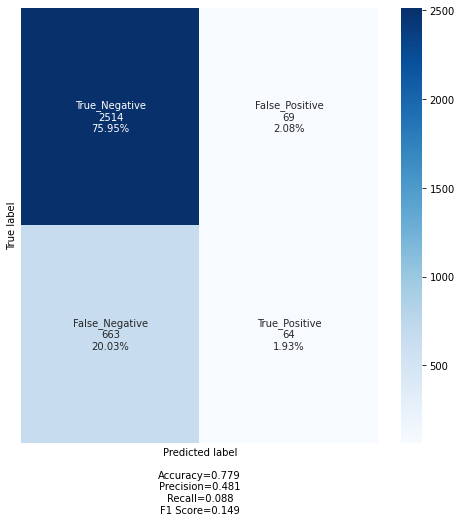

In [362]:
# Confusion Matrix

print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)


In [363]:
ml_XGB.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1,
              learning_rate=0.01, max_delta_step=5, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=False, subsample=0.8, verbosity=1)

In [364]:
a_scores_CV = funcao_cross_val_score(ml_XGB, X, y, i_CV)

Média das Acurácias calculadas pelo CV....: 77.96
std médio das Acurácias calculadas pelo CV: 0.65


In [367]:
y2=ml_XGB.predict(X_teste)
unique_elements, counts_elements = np.unique(y2, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[   0    1]
 [3194  116]]



********* CONFUSION MATRIX - PARAMETER TUNNING ***********


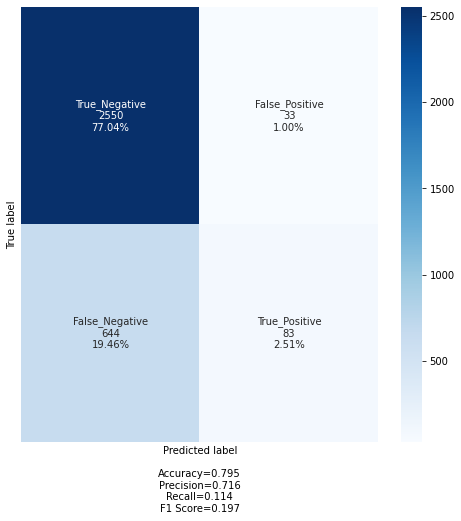

In [368]:
# Confusion Matrix

print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(y_teste, y2)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)


In [380]:
X_submit = df_test.drop(columns='id',axis=1)


In [381]:
X_submit.shape

(1000, 70)

In [382]:
y_submit = ml_XGB.predict(X_submit)

unique_elements, counts_elements = np.unique(y_submit, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[  0   1]
 [955  45]]


In [384]:
df_submit = pd.DataFrame(zip(df_test['id'],y_submit), columns = ['id','target'])

In [385]:
df_submit.head()

,id,target
0,3411,False
1,2177,False
2,8400,False
3,464,False
4,6672,False


In [386]:
df_submit.to_csv('PyLadies.csv',index = False, sep = ',')